In [1]:
# set tf 1.x for colab
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


Read about ill-conditioning: http://cnl.salk.edu/~schraudo/teach/NNcourse/precond.html

In [2]:
import tensorflow as tf
import sys
sys.path.append("../..")
from keras_utils import reset_tf_session
s = reset_tf_session()
print("We're using TF", tf.__version__)
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import matplotlib_utils
from IPython.display import HTML, display_html
import numpy as np

Using TensorFlow backend.


We're using TF 1.15.0


In [3]:
def plot_gd(x_scale, lr, steps):
    y_guess = tf.Variable([1.5, 1.5], dtype='float32')
    y_true = tf.constant([0.2, 0.2], dtype='float32')

    # x is x_scale times more important in loss (creates valleys)
    loss = tf.reduce_mean((tf.multiply(y_guess, tf.constant([x_scale, 1.])) - y_true)**2)

    step = tf.train.GradientDescentOptimizer(lr).minimize(loss, var_list=y_guess)
    
    # nice figure settings
    fig, ax = plt.subplots(figsize=(5, 5))
    y_true_value = s.run(y_true)
    level_x = np.arange(-2, 2, 0.05)
    level_y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(level_x, level_y)
    Z = (X * x_scale - y_true_value[0])**2 + (Y - y_true_value[1])**2
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    s.run(tf.global_variables_initializer())
    ax.scatter(*s.run(y_true), c='red')
    contour = ax.contour(X, Y, Z, 10)
    ax.clabel(contour, inline=1, fontsize=10)
    line, = ax.plot([], [], lw=2)

    # start animation with empty trajectory
    def init():
        line.set_data([], [])
        return (line,)

    trajectory = [s.run(y_guess)]

    # one animation step (make one GD step)
    def animate(i):
        s.run(step)
        trajectory.append(s.run(y_guess))
        line.set_data(*zip(*trajectory))
        return (line,)

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=steps, interval=20, blit=True)

    anim.save(None, writer=matplotlib_utils.SimpleMovieWriter(0.0001))

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRWXYx/twan4qv/A%2Bn/tffBGbVtMt4Z9QsY/gVqxe3jl3eWW/4qjjdtJx1xg4wRlNpbkynCDSk0ruy83vZd3o/uPeqK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRWN4yu/21Ph7FYTeNf2xvgfpo1TU4dP00XPwL1YNc3UrbY4kA8UZZifToAScAEhiqVKdGDnUkkl1bsu2782vvR7/AEV4z/wg/wDwUL/6Og%2BDP/hh9W/%2Baij/AIQf/goX/wBHQfBn/wAMPq3/AM1FBZ7NRXz1eaz%2B2RYfESy%2BEl1%2B2d8DV8S6hYS3troo%2BBerNO1vGQGlKjxQdi5OAWxuwcZ2nG//AMIP/wAFC/8Ao6D4M/8Ahh9W/wDmoptNbkQqU6jai07Ozs72fZ9nqtN9T2aivGf%2BEH/4KF/9HQfBn/ww%2Brf/ADUUy68If8FArK2kvLz9qj4LQwwoXlll%2BBWqqqKBksSfFOAAOc0iz2mivnL4WeL/ANrn426Xf678Jv21vgZr9hpupyafdX2nfAnV3g%2B0IqsypJ/wlG2UAOvzoWXORnIIHT/8IP8A8FC/%2BjoPgz/4YfVv/moqpRlCXLJWZEKkKsFODTT6rVHs1FeM/wDCD/8ABQv/AKOg%2BDP/AIYfVv8A5qKP%2BEH/AOChf/R0HwZ/8MPq3/zUVJZ7NRXjP/CD/wDBQv8A6Og%2BDP8A4YfVv/moo/4Qf/goX/0dB8Gf/DD6t/8ANRQB7NRXjJ8Ef8FCgMn9qH4MgDqf%2BFD6t/8ANRXM%2BIPGX7U3hJ2j8Vft9/s56Yy/eXUPhLfQkfXf4rFVGMpu0VcUpRirt2PoyivlC4/aS%2BJlo5juv%2BCpn7KETA8rJ4AmU/r4uqxp3x7%2BMOsOItJ/4Kc/ssXTE4C2/wAOrhyf%2B%2BfFxrT6tiUr8kv/AAF/5Gft6D%2B2vvX%2BZ9T0V4RoFv8Atu%2BK4vP8Lftk/AjUkxnfp/wV1KYY9cp4qNaP/CD/APBQv/o6D4M/%2BGH1b/5qKyaadmaJpq6PZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaikM9morxn/hB/%2BChf/R0HwZ/8MPq3/wA1FH/CD/8ABQv/AKOg%2BDP/AIYfVv8A5qKAPZqK8Z/4Qf8A4KF/9HQfBn/ww%2Brf/NRXKaH45/av8R/EzVvgzpH7b3wJk8VaGsbaloD/AAM1eO5RHjWRZFR/FAMqbWXLpuUH5SQQRVKMpJ2WxEqlODSk0ruyu932Xdn0jRXjP/CD/wDBQv8A6Og%2BDP8A4YfVv/moo/4Qf/goX/0dB8Gf/DD6t/8ANRUlns1FeI6v4c/b70LSrrXNW/ap%2BDENrZ27z3Mx%2BA2rkJGilmbA8UZOACeKoeBJP22Pid4SsfHfw/8A2xfgdq%2Bj6lCJbLULH4Gaq8cq/X/hKOCDkFTgggggEEU7O1%2BhHtKaqezuua17X1tte29r6XPfaK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRWP46n/bX%2BGXh5vFnj/9sP4IaTpkdxDBJfXnwK1ZY0eWRY0DH/hKPlBZlGTwM5JABNIKlSnRpudRpRWrbdkl3beiPfqK8J8CeO/2qfCX7VPhr4K/Gr4k/DzxPonif4eeIddt7jwn8Pb7Rbm1udOvtEgQF59YvklidNUlJARCDGhDYyD7tQWFFFFABRRRQAUUUUAFFFFABXjP7UH/ACW/9nH/ALLNff8AqFeKK9mr56/bv%2BImifCnxp8AvHviCOaS3sPjDelbe2jLy3Er%2BDPE6RQxqOrvIyIB6sKUpKMXJ7Izq1adClKpUdoxTbfZLVnovxz%2BLGseDUsPh/8ADexi1Dxr4kZotCspT%2B6tkH%2BsvbjH3YIgcnuzYUck4ufC/wCG/hX4DeBbn7fromuJGfUPE/iXVJFSS%2BuCMy3Ezk4VeOBnCKAO2azPgL8MvEWjvf8Axc%2BKixy%2BNfE6q%2Boqrbk0u1HMOnwnskYPzEffkLMSeDWD8d/HF542Hib4SaZ4IuLu20WGyuNT1O3uIJprabctzDKtizBriFTGpbcybiroucFhjRhKpP2k/kuy/wA317bdzwJVpU4PMcRH32mqUGn7qs3qknac0rzf2Y2h0lf1nQ/EOgeJ9PXVvDWuWeo2rOyrdWNyk0ZZThgGQkZBBBHauJ0b4BWj/G2/%2BOnj/wARyeINTiBt/CNrPbCO38PWhRRIsKZIaaRtxec/MV2qAqgg8x8EtF8Yav8AEGy%2BKNh4G0bRdO1fRJG8RaloGrmSw1%2Bb919luYbfCtG%2B0SEvIokVSIyz7Qw9prpfuvQ7cN7PNqEKuIp/BK8d0m0vdlZ776XvaSbi37sgrxj4x/tA%2BMta8cS/s5/svWdpqfjURK3iDXbxS%2Bm%2BErd%2Bk1yR/rbhhkxWwO5sbm2oOYfjZ8ZPHnjzx7L%2By9%2BzNfxxeJBCknjHxe0QltvCVnIODjpJeyLnyoe333wo59B%2BC3wV8B/AXwND4E8AafIkIlae%2BvruUy3Wo3TnMt1cSnmWZzyzH2AwAANYxjSipTV29l%2Br/RdfTeKtevmNaWHw0uWEXac1vfrCH97pKeqhsrz%2BDL%2BA/wCzr4M%2BBGnXl1YXd3rXiTWpBP4n8X6w/mX%2BrT4%2B9I/8Ea9EiXCIvAHUn0CivB/if%2B0h4%2B%2BI/ju%2B/Z5/Y6tbPUPENhJ5Pi3xzfxGXSPCeeqNg4u73H3bZThTgyFQCKUIVcTNv729kvP%2BvJI674TK8PGnCNl

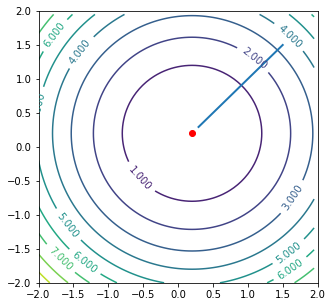

In [4]:
plot_gd(x_scale=1.0, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRXDeOPi7%2B0l8OdZh8M%2BLP28fgJDqs8yxRaRbfA3V7m7ZycAeRD4oaQc9yoHvxQYYjFYbCU%2BevOMF3k0l6ata%2BWr8j6forxn/AIQf/goX/wBHQfBn/wAMPq3/AM1FH/CD/wDBQv8A6Og%2BDP8A4YfVv/mooNz2aivDNT0r9unRLu0sNZ/a%2B%2BBlpPfzeVYw3XwR1ON7mTrsjDeKQXb2GTV3/hB/%2BChX/R0HwZ/8MPq3/wA1FAlKLbSex7NRXhXiKw/bk8Iac2seLf2w/gVpdon37rUfgnqcEa/Vn8VACuE8LftEfHfx54%2Btfhl4C/b6%2BBGv6xdu6xRaF8BNbvIVKozkvPD4maGMYU4LOMnAGSQKpQnJXSOatjcFh6kadWrGMpaJOSTbe1le7%2BSPrCivGf8AhB/%2BChf/AEdB8Gf/AAw%2Brf8AzUUf8IP/AMFC/wDo6D4M/wDhh9W/%2BaipOo9morxn/hB/%2BChf/R0HwZ/8MPq3/wA1FH/CD/8ABQv/AKOg%2BDP/AIYfVv8A5qKAPZqK8Z/4Qf8A4KF/9HQfBn/ww%2Brf/NRR/wAIP/wUL/6Og%2BDP/hh9W/8AmooA9morxn/hB/8AgoX/ANHQfBn/AMMPq3/zUUf8IP8A8FC/%2BjoPgz/4YfVv/mooA9morxh/BP8AwUIjUvJ%2B1H8GFAHJPwI1YAf%2BXTWRqN1%2B2ZpBI1b9tj4A2pHX7R8GtRTH/fXioU0m9iZThBXk0vV2PfqK%2Babz4nftGaeSL/8A4KJfs0wEdfO%2BFt4uPz8WVnzfHj4y25xcf8FNv2WUx/f%2BHNwP5%2BLatUqr2i/uf%2BRg8bgo71Yr/t6P/wAkfU1FfKn/AA0P8Vs4/wCHof7Kmf8Asns//wA11SRfHv4xTnEH/BTj9lhz/sfDq4P/ALt1P2Fb%2BR/c/wDIn6/gH/y%2Bh/4HD/5I%2Bp6K%2BZ7T4p/tD35Asf8Agov%2BzPNnp5Xwvu2/l4srX0/Uv2xdXIGlftv/ALP10T0%2Bz/BzUHz%2BXis1Lp1Fun9z/wAjWOJw0/hnF%2Bkk/wAmfQNFeLxeDP8AgoLPGJYP2pfgu6noyfAnViD/AOXTTv8AhB/%2BChf/AEdB8Gf/AAw%2Brf8AzUVBsezUV4z/AMIP/wAFC/8Ao6D4M/8Ahh9W/wDmoo/4Qf8A4KF/9HQfBn/ww%2Brf/NRQB7NRXjP/AAg//BQv/o6D4M/%2BGH1b/wCaij/hB/8AgoX/ANHQfBn/AMMPq3/zUUAezUV4z/wg/wDwUL/6Og%2BDP/hh9W/%2Baij/AIQf/goX/wBHQfBn/wAMPq3/AM1FAHs1FeM/8IP/AMFC/wDo6D4M/wDhh9W/%2BaivPPiL8df2iPhF4zTwF8Uf26vgfoGoSwJNE2q/s/65DbOr5xi5bxL5OflOV35HcDIqoxlJ2irmGIxWGwdP2leahG9ryaSu9ldtL8T6porwX4c/Eb9p/Qf2n/C3wj%2BLnxS%2BHHi7w74u%2BHGv%2BIbG%2B8HeAL3R54ZtPvdDhi/eTaxfJNDJHqshICKcxoQxBIPvVSbJpq6CiiigYUUUUAFFFFABRRRQAV8/ftyf8LGPxD/Z5T4UHRV1xvjRdrayeIPNNrGp8GeJ97OsXzsQm4hQRlsAkDJr6Brxj9qR0i%2BNf7OckjhVX4y35ZmOAB/whPijmgzqw9pTlC7V1a6dmvNPWz87Eg/ZY8U%2BPf3/AO0N%2B0B4l8TRv/rNC0OX%2BxNLK/3GjtmEso95JTn0rsfDXw1%2BD37P3ha6vvh98MLPS7e2ty80fh7QzLdXAHbEStLO54/vE1yfi39tv4H6Prkvg3wBdan4/wDEMJxJoXgDTm1OWM9P3sqEQQYPXzJFx%2BFel%2BDtZ1vxD4UsNc8Q%2BE7jQ7%2B6tlkudHu7mKWS0cjmNniZkYj1UkVTpygk5L%2BvzPEwFDIniJfVOWdWK1nrUa6a1Jc2t94qa80jndJ%2BN2ia/wCCPEfizTtA1S1uvDMc39paNq9qbe4ikW3W4VGA3Ab43jYEE8OM85FeQXPx8vfHXw90qHxD8T5Y2vNf0y71640fSL3RFj0ec%2BW32adpC8kS3GA1zG/zDcBhWU13Hwk%2BEni3w34n1/WLDwhpfhLRNV8tD4dN%2B%2Bofa5PNkM95KFKJFJIjIo2s/Ql88KFsPAv7O/wl8c23hPxJ4%2Bt3vtb02XTdA8L%2BINSgdILKacO9tbxFQzRvKEUeYXOVRFOAFrePs02kr9e5y1lm2LpU3OSgtYyveKd5aStdPVJRto9XZWaZ5frlpLql5qifFu11PxJpFhoer%2BDW12z0Z769tb2KWCS1nRYULrNKszIZFX/WWkRJGc19FfDuPxRqXwr0OHx80kesz6BbLrLRM0brcmBRKQRgod%2B4joR%2BFeXv%2B0T4A%2BFXhDXdE%2BHvweuNF0vRLPWx4ckt7G2isdSvdNEhuoI4reQyRsHjkwJEjaTy5CueC3TfCD4neNNR8a3Xwz%2BJGq6LqV63hyz17R9b0Gzkt7bULWeSVJFSOSSUgwskQzvO5J4m4JIFVYVHC9rW/r9dS8rhhsLibOpzSmrOydr3e8naT%2BG0W1sn73vIzfDv7CX7K%2Bhaiuu6p8KbfxHqY5bVPGV3NrE7t/ezePIAe/ygV6ppGi6P4fsE0rQdJtrK1iGI7a0gWONB7KoAFcN8ZfH37QHhrVbPQfgj8A7XxS13bs9xrOq%2BKodOsrB92ArjZJNIcfNhExjuDXG/8K0/b18f/P42/aR8I%2BB4Dw1j4A8

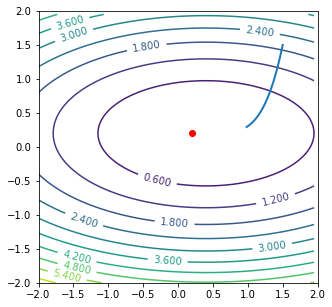

In [5]:
# narrow valleys
plot_gd(x_scale=0.5, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFo/CH/AAUCmkaKL9qj4LM6ffVfgVqpK/Uf8JTxVO20/wDbkvdbufDVn%2B2H8CptRs41kvNPi%2BCeptPAh6M8Y8VblB7EiizJc4K12tT3WivneDxN%2B1rd%2BGtQ8Z2P7dP7PlzpOkuyanqNp8HNRlhtXU4ZZHTxUQjA8EHnNafhew/bo8a6Fb%2BJ/Cf7XXwR1DT7tN9teWvwL1V0kGccEeKfWm4yW6IhiKFSSjCabavo09L2vo3pfS%2B19LnutFeM/wDCD/8ABQv/AKOg%2BDP/AIYfVv8A5qKP%2BEH/AOChf/R0HwZ/8MPq3/zUUjU9morxn/hB/wDgoX/0dB8Gf/DD6t/81FH/AAg//BQv/o6D4M/%2BGH1b/wCaigD2aivGf%2BEH/wCChf8A0dB8Gf8Aww%2Brf/NRR/wg/wDwUL/6Og%2BDP/hh9W/%2BaigD2aivGf8AhB/%2BChf/AEdB8Gf/AAw%2Brf8AzUUf8IP/AMFC/wDo6D4M/wDhh9W/%2BaigD2aivFpvB/8AwUCtxuuP2qPgsg9X%2BBOqj%2Bfimqc9j%2B3Ha/8AHz%2B2J8Co8dfM%2BCepj%2BfiqizZMpwju0j3Wivn%2BbUf2xrf/j4/be/Z/j/3/g5qA/n4rqrL4s/asg/1/wC3r%2Bzqn%2B/8I74f%2B7XT5ZdjJ4rCx3qR/wDAo/5n0VRXzbJ8Q/2lof8AXf8ABQn9mxP974VXg/8AdsqCT4rftCxf63/goz%2BzMv8AvfC%2B7H/u2U%2BSfZ/czN4/ALetD/wOP/yR9M0V8wP8ZfjtH/rP%2BCk37MC/X4aXQ/8AdtqNvjh8bE%2B//wAFL/2XB9fhvc//ADW0/Z1Oz%2B5/5EvMstX/AC/h/wCBw/8Akz6jor5aPx4%2BMo6/8FNf2Wh/3Tm4/wDmtpP%2BF9fGL/pJx%2Byz/wCG6uP/AJrqPZ1P5X9z/wAhf2pln/QRT/8AA4f/ACZ9TUV8sj49fGM9P%2BCm/wCyz/4bm4/%2Ba2nL8dfjO3C/8FM/2Wz9Phxc/wDzW0ezqfyv7n/kH9p5Z/z/AKf/AIHD/wCTPqSivl5fjZ8cH%2B5/wUs/ZeP0%2BG1z/wDNbUifF/4%2BSf6v/gpD%2BzE3%2B78Mro/%2B7bR7Op2f3P8AyKWZZc9q8P8AwOH/AMmfTtFfNEfxP/aMl/1X/BRP9mhv934W3h/92yrEXjr9p%2Bf/AFP/AAUB/Zwf/d%2BE96f/AHbKXJPs/uKWOwL2qw/8Cj/8kfR9FfPMPiH9re4/1H7dn7PL5/ufCC/P8vFdWoZP20rn/j3/AG0/gHJnps%2BDGon%2BXiqlyy7GixGHltOP3r/M98orwnwJ47/ap8JftU%2BGvgr8aviT8PPE%2BieJ/h54h123uPCfw9vtFubW506%2B0SBAXn1i%2BSWJ01SUkBEIMaENjIPu1I2CiiigAooooAKKKKACiiigAr58/bo%2BJXgr4R/EH9nrx38QtZNhpVr8abpZ7kW0sxVn8GeJ0UBIlZzlmA4B619B14z%2B1B/yW/8AZx/7LNff%2BoV4opq19SKiqOm1TaUraNq6T81dX9Lr1Gf8N9fs%2BXnHhqLxrrR7DSfhxrEmfoTagH86T/htSyuf%2BQP%2By78aL0H7pX4ey24P43Lx17VQSAMk4A6k1pzUv5fx/wCAeX9VzmXxYqK9KUf/AG6bPFv%2BGqPizqX/ACLX7DnxNlz93%2B1JtJsvz33pxXqPgDXvE/ifwhZ674y8C3HhrUrhXNzol3fQXMlqQ7KoaSBmjbKgN8pON2DyDTNY%2BJfw48O5/wCEg%2BIGiWO3732zVYYsf99MKv6B4i0DxXpEPiDwtrlnqVhcBjb3thdJNDLhip2uhKnDAg4PBBHalP4dI2%2B/9TbCUq1Os/aYl1Hb4bU1bztHXy1djwjwJf8Awv8AC37UWpa14C1zwrLpc2i3UWqweEtLS1GlTC5g51BonZbieSUuqFljZfmG1ssw59PBmq6v41TwJpnh29i8Wwa/4kl17VG0%2BRI5bC7s7gW8zXBUJIrF7WMKGLKwJ2jYTXq/gbxx8U4fjlf/AAs8aa7oWtW6aB/ack%2BiaPLanSmafy4beYvPMJDIm9lPyE%2BUxC46cZa/GH4r%2BDfG3i63%2BJOqa9BKX1Y%2BBtNvPD9pHpl%2Blvbm4jEc8RM7uI0kYiQpuCtgEgZ6lGbbt2XXf%2Buv3ngVMJh/ZRU21H2k72jZR2bW7s3ZKLXVyit7HM6b4T8X69pNp4o8N/DjXrGPw1pXhNtZ0u50aa3mvbnT7oPcQQJKq/aWigSRFdN0bmRQjtzj2L9nfSdZttO8UeJ9S0e90628R%2BMbvVNLsNSt2huIbd4oY/3kbcxl5IpZNp5xICeSa8kl%2BK3xf0zRbLwdq/xTvtT/AOEpj8L3I8QRWtrDc6ZDqV0lvcLCYYljChnXymdGZVzuZzzXrX7OviPxHqel%2BJvCniTWLnUn8KeLrrR7XVL1g093AkUEsbysoAaQCbYzADJQ8A5pVoTVNt2/Hv8A5/M0ymjhoYyDi5Xs91FLm5fJv7Hb3W9d9Cj49%2BEf7R/ibxbe6v4O/a3uvDekzups9HtfBGn3LWwCKCPOnDF8sGbJHG7Hasj/AIZq%2BP8Aef8AIa/bt8cSZ6/YfD%2BjW3/oNocVo/EH9oT4u%2BFfGN94U8G/seeN/E0Fo6rFrNn

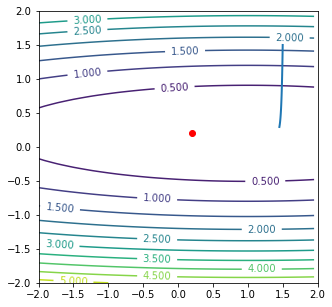

In [6]:
# narrower valleys
plot_gd(x_scale=0.2, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFo/CH/AAUCmkaKL9qj4LM6ffVfgVqpK/Uf8JTxVO20/wDbkvdbufDVn%2B2H8CptRs41kvNPi%2BCeptPAh6M8Y8VblB7EiizJc4K12tT3WivneDxN%2B1rd%2BGtQ8Z2P7dP7PlzpOkuyanqNp8HNRlhtXU4ZZHTxUQjA8EHnNafhew/bo8a6Fb%2BJ/Cf7XXwR1DT7tN9teWvwL1V0kGccEeKfWm4yW6IhiKFSSjCabavo09L2vo3pfS%2B19LnutFeM/wDCD/8ABQv/AKOg%2BDP/AIYfVv8A5qKP%2BEH/AOChf/R0HwZ/8MPq3/zUUjU9morxn/hB/wDgoX/0dB8Gf/DD6t/81FH/AAg//BQv/o6D4M/%2BGH1b/wCaigD2aivGf%2BEH/wCChf8A0dB8Gf8Aww%2Brf/NRR/wg/wDwUL/6Og%2BDP/hh9W/%2BaigD2aivGf8AhB/%2BChf/AEdB8Gf/AAw%2Brf8AzUUf8IP/AMFC/wDo6D4M/wDhh9W/%2BaigD2aivFpvB/8AwUCtxuuP2qPgsg9X%2BBOqj%2Bfimqc9j%2B3Ha/8AHz%2B2J8Co8dfM%2BCepj%2BfiqizZMpwju0j3Wivn%2BbUf2xrf/j4/be/Z/j/3/g5qA/n4rqrL4s/asg/1/wC3r%2Bzqn%2B/8I74f%2B7XT5ZdjJ4rCx3qR/wDAo/5n0VRXzbJ8Q/2lof8AXf8ABQn9mxP974VXg/8AdsqCT4rftCxf63/goz%2BzMv8AvfC%2B7H/u2U%2BSfZ/czN4/ALetD/wOP/yR9M0V8wP8ZfjtH/rP%2BCk37MC/X4aXQ/8AdtqNvjh8bE%2B//wAFL/2XB9fhvc//ADW0/Z1Oz%2B5/5EvMstX/AC/h/wCBw/8Akz6jor5aPx4%2BMo6/8FNf2Wh/3Tm4/wDmtpP%2BF9fGL/pJx%2Byz/wCG6uP/AJrqPZ1P5X9z/wAhf2pln/QRT/8AA4f/ACZ9TUV8sj49fGM9P%2BCm/wCyz/4bm4/%2Ba2nL8dfjO3C/8FM/2Wz9Phxc/wDzW0ezqfyv7n/kH9p5Z/z/AKf/AIHD/wCTPqSivl5fjZ8cH%2B5/wUs/ZeP0%2BG1z/wDNbUifF/4%2BSf6v/gpD%2BzE3%2B78Mro/%2B7bR7Op2f3P8AyKWZZc9q8P8AwOH/AMmfTtFfNEfxP/aMl/1X/BRP9mhv934W3h/92yrEXjr9p%2Bf/AFP/AAUB/Zwf/d%2BE96f/AHbKXJPs/uKWOwL2qw/8Cj/8kfR9FfPMPiH9re4/1H7dn7PL5/ufCC/P8vFdWoZP20rn/j3/AG0/gHJnps%2BDGon%2BXiqlyy7GixGHltOP3r/M98orwnwJ47/ap8JftU%2BGvgr8aviT8PPE%2BieJ/h54h123uPCfw9vtFubW506%2B0SBAXn1i%2BSWJ01SUkBEIMaENjIPu1I2CiiigAooooAKKKKACiiigAr58/bo%2BJXgr4R/EH9nrx38QtZNhpVr8abpZ7kW0sxVn8GeJ0UBIlZzlmA4B619B14z%2B1B/yW/8AZx/7LNff%2BoV4opq19SKiqOm1TaUraNq6T81dX9Lr1Gf8N9fs%2BXnHhqLxrrR7DSfhxrEmfoTagH86T/htSyuf%2BQP%2By78aL0H7pX4ey24P43Lx17VQSAMk4A6k1pzUv5fx/wCAeX9VzmXxYqK9KUf/AG6bPFv%2BGqPizqX/ACLX7DnxNlz93%2B1JtJsvz33pxXqPgDXvE/ifwhZ674y8C3HhrUrhXNzol3fQXMlqQ7KoaSBmjbKgN8pON2DyDTNY%2BJfw48O5/wCEg%2BIGiWO3732zVYYsf99MKv6B4i0DxXpEPiDwtrlnqVhcBjb3thdJNDLhip2uhKnDAg4PBBHalP4dI2%2B/9TbCUq1Os/aYl1Hb4bU1bztHXy1djwjwJf8Awv8AC37UWpa14C1zwrLpc2i3UWqweEtLS1GlTC5g51BonZbieSUuqFljZfmG1ssw59PBmq6v41TwJpnh29i8Wwa/4kl17VG0%2BRI5bC7s7gW8zXBUJIrF7WMKGLKwJ2jYTXq/gbxx8U4fjlf/AAs8aa7oWtW6aB/ack%2BiaPLanSmafy4beYvPMJDIm9lPyE%2BUxC46cZa/GH4r%2BDfG3i63%2BJOqa9BKX1Y%2BBtNvPD9pHpl%2Blvbm4jEc8RM7uI0kYiQpuCtgEgZ6lGbbt2XXf%2Buv3ngVMJh/ZRU21H2k72jZR2bW7s3ZKLXVyit7HM6b4T8X69pNp4o8N/DjXrGPw1pXhNtZ0u50aa3mvbnT7oPcQQJKq/aWigSRFdN0bmRQjtzj2L9nfSdZttO8UeJ9S0e90628R%2BMbvVNLsNSt2huIbd4oY/3kbcxl5IpZNp5xICeSa8kl%2BK3xf0zRbLwdq/xTvtT/AOEpj8L3I8QRWtrDc6ZDqV0lvcLCYYljChnXymdGZVzuZzzXrX7OviPxHqel%2BJvCniTWLnUn8KeLrrR7XVL1g093AkUEsbysoAaQCbYzADJQ8A5pVoTVNt2/Hv8A5/M0ymjhoYyDi5Xs91FLm5fJv7Hb3W9d9Cj49%2BEf7R/ibxbe6v4O/a3uvDekzups9HtfBGn3LWwCKCPOnDF8sGbJHG7Hasj/AIZq%2BP8Aef8AIa/bt8cSZ6/YfD%2BjW3/oNocVo/EH9oT4u%2BFfGN94U8G/seeN/E0Fo6rFrNn

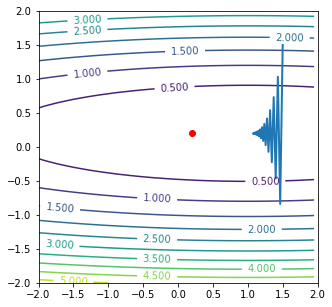

In [7]:
# bigger learning rate then?
# x is changed faster, but y changes are too big, leads to oscillation
plot_gd(x_scale=0.2, lr=1.8, steps=25)